## Chapter 15: Testing Your Website with Scrapers
### Unittest Demoe

In [1]:
import unittest


class TestAddition(unittest.TestCase):
    def setUp(self):
        print('Setting up the test')

    def tearDown(self):
        print('Tearing down the test')

    def test_twoPlusTwp(self):
        total = 2+2
        self.assertEqual(4, total)


if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)
    %reset
    # code format dependences, run every time after %reset
    import json
    import autopep8

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


Setting up the test
Tearing down the test
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Testing Wikepedia

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import unittest


class TestWikipedia(unittest.TestCase):
    bs = None

    def setUpClass():
        url = 'http://en.wikipedia.org/wiki/Monty_Python'
        TestWikipedia.bs = BeautifulSoup(urlopen(url), 'html.parser')

    def test_titleText(self):
        pageTitle = TestWikipedia.bs.find('h1').get_text()
        self.assertEqual('Monty Python', pageTitle)

    def test_contentExists(self):
        content = TestWikipedia.bs.find('div', {'id': 'mw-content-text'})
        self.assertIsNotNone(content)


if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)
    %reset
    # code format dependences, run every time after %reset
    import json
    import autopep8

..
----------------------------------------------------------------------
Ran 2 tests in 2.384s

OK


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import unittest
import re
import random
from urllib.parse import unquote  # unquote escape like %20


class TestWikipedia(unittest.TestCase):
    def testPageProperties(self):
        self.url = 'http://en.wikipedia.org/wiki/Monty_Python'
        # Test first 10 pages we encounter
        for i in range(1, 10):
            print(self.url)
            self.bs = BeautifulSoup(urlopen(self.url), 'html.parser')
            titles = self.titleMatchesURL()
            self.assertEqual(titles[0], titles[1])
            self.assertTrue(self.contentExists())
            self.url = self.getNextLink()
        print('Done')

    def titleMatchesURL(self):
        pageTitle = self.bs.find('h1').get_text()
        urlTitle = self.url[(self.url.index('/wiki/')+6):]
        urlTitle = urlTitle.replace('_', ' ')
        urlTitle = unquote(urlTitle)
        return [pageTitle.lower(), urlTitle.lower()]

    def contentExists(self):
        content = self.bs.find('div', {'id': 'mw-content-text'})
        if content is not None:
            return True
        else:
            return False

    def getNextLink(self):
        # Return random link on page
        links = self.bs.find('div', {'id': 'bodyContent'}).find_all(
            'a', href=re.compile('^(/wiki/)((?!:).)*$'))
        randomLink = random.SystemRandom().choice(links)
        return 'http://en.wikipedia.org{}'.format(randomLink.attrs['href'])


if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)
    %reset
    import json
    import autopep8

http://en.wikipedia.org/wiki/Monty_Python
http://en.wikipedia.org/wiki/The_Brand_New_Monty_Python_Bok
http://en.wikipedia.org/wiki/Eric_the_Half-a-Bee
http://en.wikipedia.org/wiki/List_of_Monty_Python%27s_Flying_Circus_episodes
http://en.wikipedia.org/wiki/Larch
http://en.wikipedia.org/wiki/Uncaria_gambir
http://en.wikipedia.org/wiki/Dye
http://en.wikipedia.org/wiki/Armenian_cochineal
http://en.wikipedia.org/wiki/Aeluropus


.
----------------------------------------------------------------------
Ran 1 test in 21.212s

OK


Done
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Selenium Demo

In [4]:
from selenium import webdriver

driver=webdriver.Chrome()
driver.get('http://en.wikipedia.org/wiki/Monty_Python')
assert 'Monty Python' in driver.title
driver.close()

### Selenium: Filling Forms

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains

driver = webdriver.PhantomJS()
try:
    driver.get('http://pythonscraping.com/pages/files/form.html')
    firstnameField = driver.find_element_by_name('firstname')
    lastnameField = driver.find_element_by_name('lastname')
    submitButton = driver.find_element_by_id('submit')
    print('Method No.1')
    firstnameField.send_keys('Testing')
    lastnameField.send_keys('No.1')
    submitButton.click()

    print(driver.find_element_by_tag_name('body').text)
finally:
    driver.close()

driver = webdriver.PhantomJS()
try:
    driver.get('http://pythonscraping.com/pages/files/form.html')
    firstnameField = driver.find_element_by_name('firstname')
    lastnameField = driver.find_element_by_name('lastname')
    submitButton = driver.find_element_by_id('submit')
    print('Method No.2')
    actions = ActionChains(driver).click(firstnameField).send_keys(
        'Testing').click(lastnameField).send_keys('No.2').send_keys(Keys.RETURN)
    actions.perform()

    print(driver.find_element_by_tag_name('body').text)
finally:
    driver.close()

/Users/wyh/.pyenv/versions/3.6.5/envs/scraping/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


Method No.1
Hello there, Testing No.1!


/Users/wyh/.pyenv/versions/3.6.5/envs/scraping/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


Method No.2
Hello there, Testing No.2!


### Selenium: Drag and Drop

In [6]:
from selenium import webdriver
from selenium.webdriver import ActionChains

try:
    # The test failed with PhantomJS
    driver = webdriver.Chrome()
    driver.get('http://pythonscraping.com/pages/javascript/draggableDemo.html')

    message = driver.find_element_by_id('message')
    print(message.text)

    element = driver.find_element_by_id('draggable')
    target = driver.find_element_by_id('div2')
    actions = ActionChains(driver)
    actions.drag_and_drop(element, target).perform()

    print(message.text)
finally:
    driver.close()

Prove you are not a bot, by dragging the square from the blue area to the red area!
You are definitely not a bot!


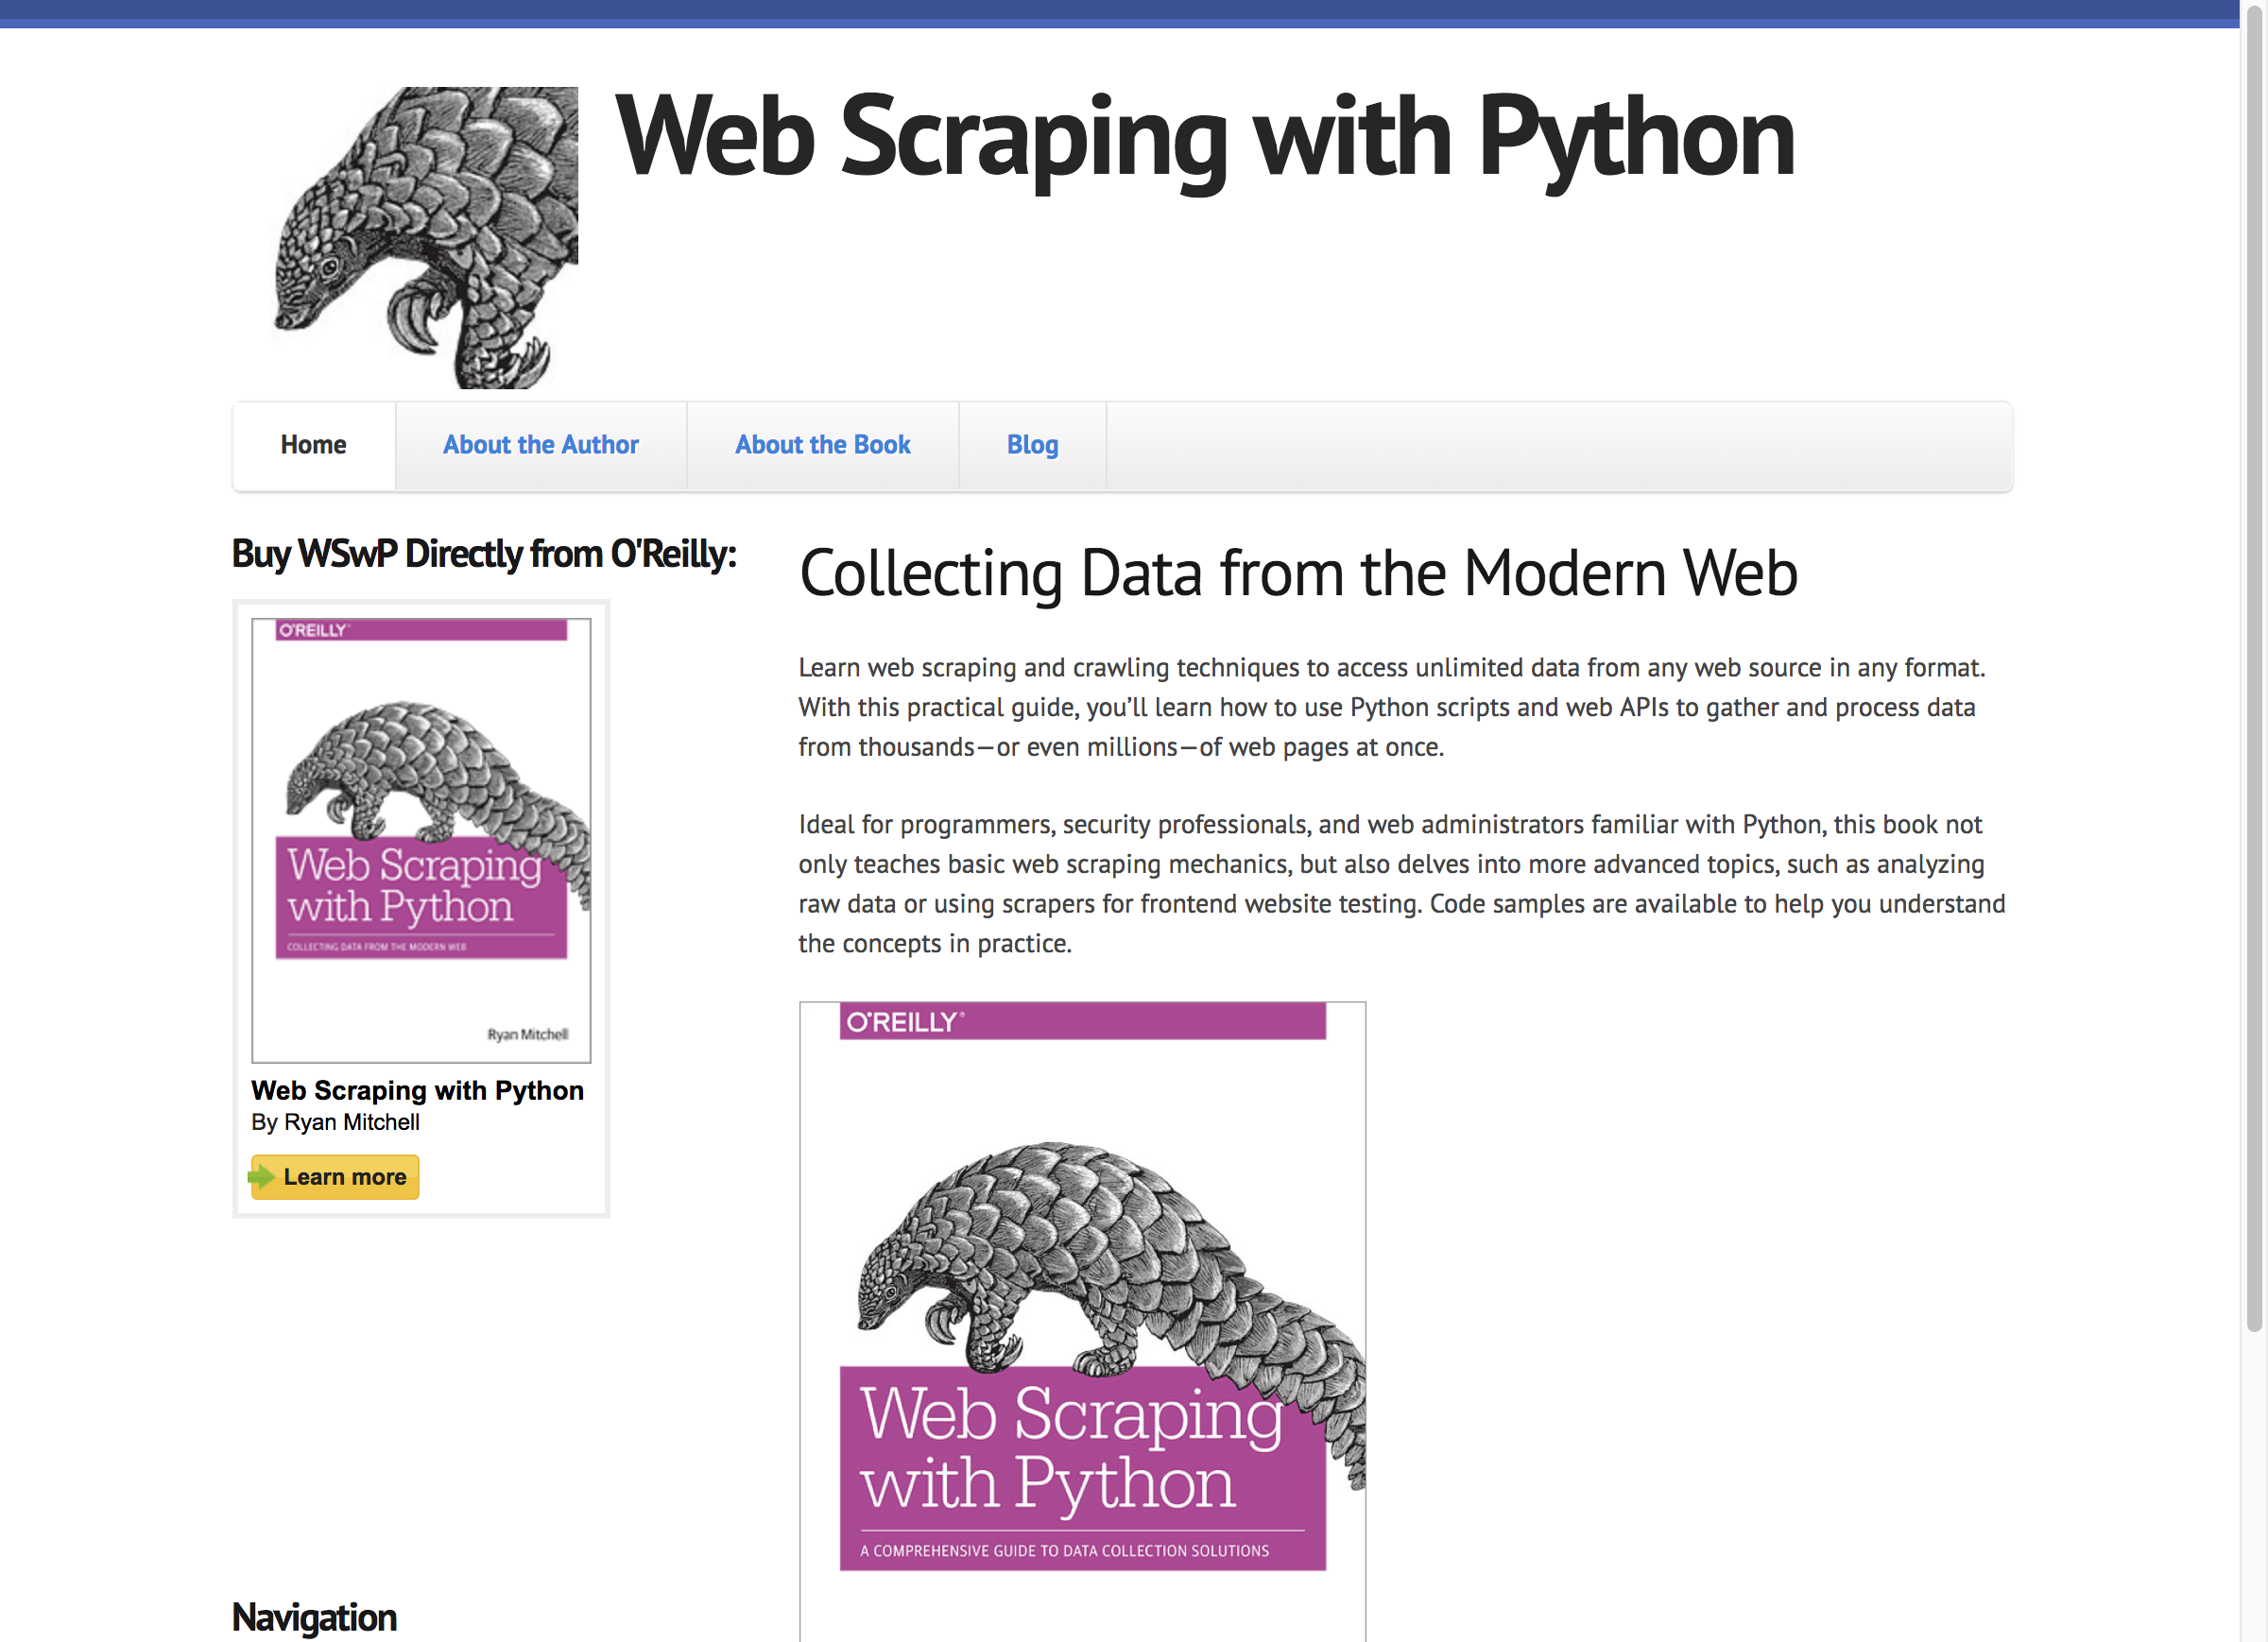

In [7]:
# screenshoot with selenium
from selenium import webdriver
from IPython.display import Image

try:
    driver = webdriver.Chrome()
    driver.implicitly_wait(5)
    driver.get('http://www.pythonscraping.com/')
    driver.get_screenshot_as_file('./pythonscraping.png')

    display(Image(filename='./pythonscraping.png'))
finally:
    driver.close()

In [8]:
# restructure drag_and_drop code as unittest class
from selenium import webdriver
from selenium.webdriver import ActionChains
import unittest


class TestDragAndDrop(unittest.TestCase):
    driver = None

    def setUp(self):
        self.driver = webdriver.Chrome()
        url = 'http://pythonscraping.com/pages/javascript/draggableDemo.html'
        self.driver.get(url)

    def tearDown(self):
        self.driver.close()
        print('Tearing down the test')

    def test_drag(self):
        element = self.driver.find_element_by_id('draggable')
        target = self.driver.find_element_by_id('div2')
        actions = ActionChains(self.driver)
        actions.drag_and_drop(element, target).perform()
        self.assertEqual('You are definitely not a bot!',
                         self.driver.find_element_by_id('message').text)


if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)
    %reset
    import json
    import autopep8

.
----------------------------------------------------------------------
Ran 1 test in 7.349s

OK


Tearing down the test
Once deleted, variables cannot be recovered. Proceed (y/[n])? y
